# Problem Set 2 Exercise 5

### Part 2.5.d.iv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import load_data as ld
import random_booster as rb
import stump_booster as sb
import errors_over_time as eot
import importlib as im

First we need to load the training and testing data sets and shape the data to run the analysis.

In [2]:
training_data, testing_data = ld.load_dataset('boosting-train.csv', 'boosting-test.csv')
Xtrain = training_data.iloc[:, 1:].as_matrix()
ytrain = training_data.iloc[:, 0].as_matrix()
Xtest  = testing_data.iloc[:, 1:].as_matrix()
ytest  = testing_data.iloc[:, 0].as_matrix()

Then we compute the boosting data using decision stumps, followed by doing regression using random boosting.

In [3]:
theta, feature_indices, thresholds = sb.stump_booster(Xtrain, ytrain, 200)

In [4]:
theta_rnd, feature_indices_rnd, thresholds_rnd = rb.random_booster(Xtrain, ytrain, 200)

Now we perform the error analysis for both stump boosting and random booosting.

In [5]:
training_errors, testing_errors = eot.compute_errors_over_time(Xtrain, ytrain, Xtest, ytest, theta, feature_indices, thresholds)

In [6]:
training_errors_rnd, testing_errors_rnd = eot.compute_errors_over_time(Xtrain, ytrain, Xtest, ytest, theta_rnd, feature_indices_rnd, thresholds_rnd)

Finally we plot the results. Notice that the error rate for both boosting classifiers converges as the number of iterations of boosting increases. Stump boosting converges faster than random boosting.

In [7]:
fig = plt.figure(figsize=(20,10))
plot1 = plt.subplot(121)
plot1.set_title('Stump Boosting')
plot1.grid()
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.plot(training_errors, label='training errors')
plt.plot(testing_errors, label='testing errors')
plt.legend()
plot2 = plt.subplot(122)
plot2.set_title('Random Boosting')
plot2.grid()
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.plot(training_errors_rnd, label='training error')
plt.plot(testing_errors_rnd, label='testing error')
plt.legend()

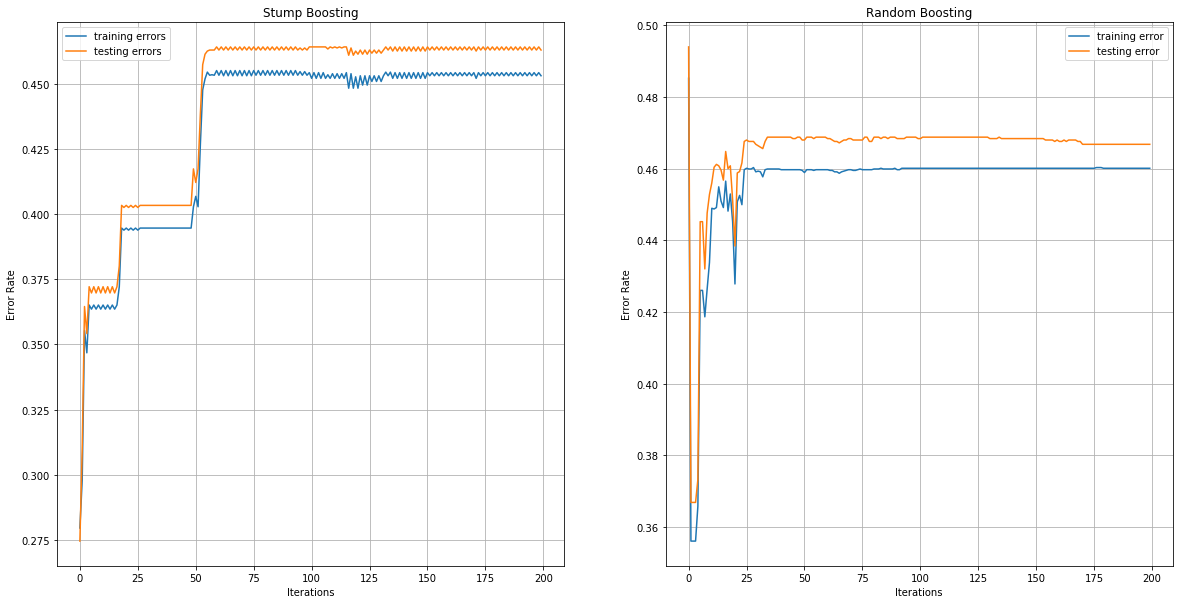

In [8]:
plt.show()